# Statistics arround self-management corpus

In [147]:
import pickle
import pandas as pd
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import numpy as np

plt.ioff()

In [175]:
train_df = pickle.load(open("train_dataset.p", "rb"))
test_df = pickle.load(open("test_dataset.p", "rb"))
validation_df = pickle.load(open("validation_dataset.p", "rb"))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
train_df

premise  \
0    L' autogestion : ce spectre ne hante pas l' Eu...   
1    L' autogestion : ce spectre ne hante pas l' Eu...   
2     Car une des découvertes qu' apporte la moindr...   
3    C’ est pourquoi , enchaîne aussitôt Proudhon ,...   
4    C’ est pourquoi , enchaîne aussitôt Proudhon ,...   
5     35 ) . Proudhon constate ensuite que le régim...   
6    territoriales de la commune offrent aussi au c...   
7    territoriales de la commune offrent aussi au c...   
8     Mais , en même temps , on « regrette » que ce...   
9    — l’ Université 1968 ne doit pas être seulemen...   
10   — l’ Université 1968 ne doit pas être seulemen...   
11    Cette tâche exigeait que puissent être rendus...   
12   Chacun des ministères économiques forma en son...   
13   Chacun des ministères économiques forma en son...   
14    C’ est pour cela que tous les changements eff...   
15   — Xe anniversaire , n° 37 - 38 66 - 67 . — Pré...   
16   — Xe anniversaire , n° 37 - 38 66 - 67 . — Pré...   
17    ACINADE Georges — Economie et autogestion en ...   
18   Maoïstes , etc. ) parle avec une fierté toute ...   
19   Maoïstes , etc. ) parle avec une fierté toute ...   
20    Elle reflétait toute une conception de la lut...   
21   Certains événements historiques fonctionnant c...   
22   Certains événements historiques fonctionnant c...   
23    C’ est ici que le bât blesse : la crispation ...   
24   mai et de juin constituent le véritable tourna...   
25   mai et de juin constituent le véritable tourna...   
26    La question est donc la suivante : une autoge...   
27   Anna Mikhaïlovna PANKRATOVA : « Les Comités d'...   
28   Anna Mikhaïlovna PANKRATOVA : « Les Comités d'...   
29    C' est ainsi que l' un des députés de la conf...   
30   conséquences de la technologie de la puissance...   
31   conséquences de la technologie de la puissance...   
32    La gestion sociale -a cessé d’ être un privil...   
33   Définie abstraitement par la théorie politique...   
34   Définie abstraitement par la théorie politique...   
35    Pour la raison , fondamentalement juste , mai...   
36   leurs surtout les plus opprimés et exploités ....   
37   leurs surtout les plus opprimés et exploités ....   
38    Ces Etats généraux « centraux » ont été prépa...   
39   Liège , Université populaire d’ été ( 25 - 31 ...   
40   Liège , Université populaire d’ été ( 25 - 31 ...   
41    Question.— à partir de ces études de temps , ...   
42   pose donc sur le plan du stafut de l’ entrepri...   
43   pose donc sur le plan du stafut de l’ entrepri...   
44    C’ est d’ une part le plan du domaine social ...   
45   La parution des Cahiers de l’ Autogestion peut...   
46   La parution des Cahiers de l’ Autogestion peut...   
47    Lourau oppose ainsi dans ce même numéro 2 des...   
48   dation des conseils 18,05 % ( 13 ) 4 ) Concept...   
49   dation des conseils 18,05 % ( 13 ) 4 ) Concept...   
50    Afin de pouvoir être comparées avec les activ...   
51   centration unique et hiérarchique , il apparaî...   
52   centration unique et hiérarchique , il apparaî...   
53    Dans une théorie scientifique de l’ organisat...   
54   ceux , dans le monde , qui gagnant péniblement...   
55   ceux , dans le monde , qui gagnant péniblement...   
56    Ce livre , qui fut comme la bible de l’ anarc...   
57   pote reste l’ état - dieu , « seul le mode d’ ...   
58   pote reste l’ état - dieu , « seul le mode d’ ...   
59    Dès lors , « ce n’ est plus le gouvernement q...   
60   « Et pourtant nous en avons autant qu’ eux dan...   
61   « Et pourtant nous en avons autant qu’ eux dan...   
62    Et nous le disons pour qu’ on ne s’ y méprenn...   
63   bâtiment B , la tour administrative , qui se t...   
64   bâtiment B , la tour administrative , qui se t...   
65    Dans les années qui ont suivi , les tendances...   
66   Rejetant délibérément la facilité d’ un schéma...   
67   Rejetant délibérément la facilité d’ un schéma...   
68    12 . 77 . ) . d’ autres cultures primit

In [176]:
presence_in_corpora = []
for df in [train_df, test_df, validation_df]:
    articles_in_dataset = {}
    for elem in pd.concat([df.premiseid, df.hypothesisid]):
        key = elem.split(':')[0]
        if key in articles_in_dataset:    
            articles_in_dataset[key][0] += 1
        else:
            articles_in_dataset[key] = [1]
        #articles_in_dataset.append(len(df[(df.premiseid == str(i)+':1') | (df.premiseid == str(i)+':2') | (df.hypothesisid == str(i)+':2') | (df.hypothesisid == str(i)+':2')]))
    #count_df = pd.DataFrame({'presence':[elem for elem in set(articles_in_dataset)], 'articles':[sum(n for n in articles_in_dataset if n == l ) for l in set(articles_in_dataset)]})
    count_df = pd.DataFrame(articles_in_dataset)
    presence_in_corpora.append(count_df)

presence_in_corpora[0]

9  105  39  119  38  85  153  42  25  16  82  8  73  95  110  10  115  104  \
0  4    4   4    4   4   5    4   4   4   4   5  4   5   4    4   4    5    4   

   128  103  143  23  72  78  46  112  3  150  40  66  45  88  36  135  48  \
0    5    4    4   4   4   5   4    4  4    4   4   4   7   4   4    4   5   

   44  120  121  94  134  76  61  6  86  131  92  113  37  0  80  64  75  129  \
0   6    5    4   6    4   5   4  6   5    5   5    4   4  4   5   6   4    5   

   124  87  155  152  43  74  96  144  102  116  59  54  34  122  69  20  28  \
0    5   4    6    4   4   7   6    4    4    5   4   4   4    6   5   5   6   

   77  139  56  15  17  32  123  100  136  47  90  22  154  146  12  81  133  \
0   7    4   6   5   5   4    5    5    6   5   7   5    5    5   6   5    6   

   71  18  117  27  145  107  58  99  19  35  41  60  108  118  111  55  63  \
0   5   7   10   6    5    5   5   6   6   4   4   5    6    5    5   9   6   

   126  137  98  52  142  31  4  109  70  149  91  21  132  127  26  53  14  \
0    7    6   5   7    7   5  7    8   5    8   8   5    5    8   6   5  10   

   51  50  148  84  130  97  138  89  140   5  33  125  83  49  68  114  30  \
0   8   9    6   6    6   7    6   5    6  10   9    9   9   9   5    7   9   

   11  65  24  29  57  151  156   1  141  147  106  101  67  13  79  62  93  \
0   5  14  12   9   9    8    6  11    9   10    8    8  10  10  12   8  13   

   7   2  
0  9  15

In [133]:
articles = pickle.load(open("articles.p", "rb"))


In [134]:
dic = Dictionary([a.split() for a in articles])
print("Number of documents, size of vocabulary")
vocabulary_size = len(dic.token2id)
dic.num_docs, len(dic.token2id)

Number of documents, size of vocabulary


(210, 47014)

In [138]:
words = 0
for art in articles:
    words += len([elem for elem in art.split(' ') if elem.isalnum() or len(elem)>1])
print("number of words")
words

number of words


1126277

In [156]:
print("lexical richness")
lex_richness = vocabulary_size / words
lex_richness

lexical richness


0.04174283946134033

### V = vocabulary size
### N = corpus size (number of words)
## Lexical richness = $\frac{V}{N}$

In [139]:
hapax_legomena = 0
dis_legomena = 0
tris_legomena = 0
tetrakis_legomena = 0
for i in range(len(dic)):
    if dic.cfs[i] == 1:
        hapax_legomena += 1
    if dic.cfs[i] == 2:
        dis_legomena += 1
    if dic.cfs[i] == 3:
        tris_legomena += 1
    if dic.cfs[i] == 4:
        tetrakis_legomena += 1
print("ratios of m type words in vocabulary for m = 1, 2, 3, 4")
hapax_legomena, dis_legomena, tris_legomena, tetrakis_legomena

ratios of m type words in vocabulary for m = 1, 2, 3, 4


(22270, 6591, 3286, 2161)

## Vocabulary frequencies' distribution ($\frac{V(m,N)}{V}$)
$\frac{V(1,N)}{V}$ and $\frac{V(2,N)}{V}$ evaluate ratio of rare words in
vocabulary

$\frac{V(1,N)}{V}$is often used as a proxy of noiseness of a corpus.

$\frac{V(1,N)}{V}=\frac{44000}{79922}=0.55$

$\frac{V(2,N)}{V}=\frac{11415}{79922}=0.1428$

$\frac{V(3,N)}{V}=\frac{5446}{79922}=0.5686$

$\frac{V(4,N)}{V}=\frac{V(\textit{mid m},N)}{V}=\frac{3363}{79922}=0.042$

Parameters | Value
--- | ---
words (tokens) | 1096734
different words (types) | 79922
number of sentences | 38657
words per article | 525
sentences per article | 184
words per sentence | 28
mid m | 3363
m = 1 | 44000
m = 2 | 11425
m= 3  | 5446

In [140]:
sentences = 0
for art in articles:
    sentences += len([elem for elem in art.split('.')  if len(elem) > 10])
print("number of sentences")
sentences

number of sentences


39038

In [141]:
print("words per article")
wpa = sum([len(elem) for elem in [[i for i in art.split(' ') if len(i) > 10] for art in articles] if len(elem) > 10])/len(articles)
wpa

words per article


415.4190476190476

In [142]:
print("sentences per article")
spa = sum([len(elem) for elem in [[i for i in art.split('.') if len(i) > 10] for art in articles]])/len(articles)
spa

sentences per article


185.89523809523808

In [143]:
print("words per sentence")
wps = words / sentences
wps

words per sentence


28.85078641323838

In [144]:
pd.DataFrame({'words(tokens)':[words], 'different words':[vocabulary_size], 'number of sentences':[sentences], 'words/article':[wpa], 'sentences/article':[spa],'words/sentence':[wps],'mid m':[tetrakis_legomena], 'm = 1':[hapax_legomena], 'm = 2':[dis_legomena], 'm = 3':[tris_legomena]})

words(tokens)  different words  number of sentences  words/article  \
0        1126277            47014                39038     415.419048   

   sentences/article  words/sentence  mid m  m = 1  m = 2  m = 3  
0         185.895238       28.850786   2161  22270   6591   3286

0.47368868847577317

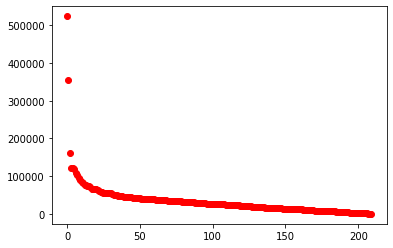

In [145]:
lengths = [len(a) for a in articles]
nbwords = [len(a.split(' ')) for a in articles]
ident = [i for i, tmp in enumerate(articles)]
lengths.sort(reverse=True)
plt.plot(ident, lengths, "ro")
plt.show()

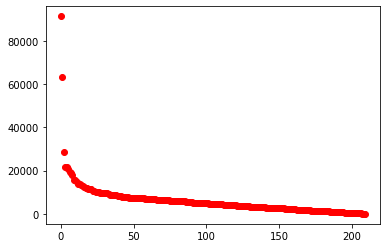

In [146]:
nbwords.sort(reverse=True)
plt.plot(ident, nbwords, 'ro')
plt.show()

In [191]:
validation_df.to_csv('archival_dataset_validation.csv', encoding='utf-8-sig')